# Bike Sharing Demand

- 도시 자전거 공유 시스템 사용 예측
- [캐글](https://www.kaggle.com)의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 bike_train.csv bike_test.csv로 저장 

- 자전거 대여량을 예측하는 문제
- Evaluation : Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

## 데이터 탐색 및 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
# 스타일 리스트 출력
#plt.style.available

* [Style 정보](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [3]:
bike_train = pd.read_csv('datasets/bike_train.csv')
bike_test = pd.read_csv('datasets/bike_test.csv')

In [4]:
bike_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [5]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* datetime이 문자열로 되어있음 : datetime 타입으로 변경

In [6]:
# 시각화만을 위해 사용할 DataFrame 생성
bike = pd.DataFrame()

In [7]:
bike['datetime'] = bike_train.datetime.apply(pd.to_datetime)

* datetime 타입에서 년, 월, 일, 시간 추출

In [10]:
bike['year'] = bike.datetime.apply(lambda x : x.year)
bike['month'] = bike.datetime.apply(lambda x : x.month)
bike['day'] = bike.datetime.apply(lambda x : x.day)
bike['hour'] = bike.datetime.apply(lambda x: x.hour)

* 그 외 데이터들 bike에 copy

In [11]:
bike["season"] = bike_train["season"] 
bike["weather"] = bike_train["weather"]
bike["workingday"] = bike_train["workingday"] 
bike["count"] = bike_train["count"] 

In [12]:
bike["atemp"] = bike_train["atemp"] 
bike["temp"] = bike_train["temp"] 
bike["humidity"] = bike_train["humidity"] 
bike["windspeed"] = bike_train["windspeed"] 

* 누락데이터 및 데이터 타입 확인

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   year        10886 non-null  int64         
 2   month       10886 non-null  int64         
 3   day         10886 non-null  int64         
 4   hour        10886 non-null  int64         
 5   season      10886 non-null  int64         
 6   weather     10886 non-null  int64         
 7   workingday  10886 non-null  int64         
 8   count       10886 non-null  int64         
 9   atemp       10886 non-null  float64       
 10  temp        10886 non-null  float64       
 11  humidity    10886 non-null  int64         
 12  windspeed   10886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


In [15]:
bike_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


* 열삭제  
- count는 casual과 register를 합한 결과, 또한 test.csv에 없는 내용이므로 삭제

In [16]:
drop_columns = ['casual','registered']
bike_train.drop(drop_columns, axis=1,inplace=True)

- 누락값 확인

In [17]:
bike_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

- 시간대/계절별 대여량 확인

<AxesSubplot:xlabel='weather', ylabel='count'>

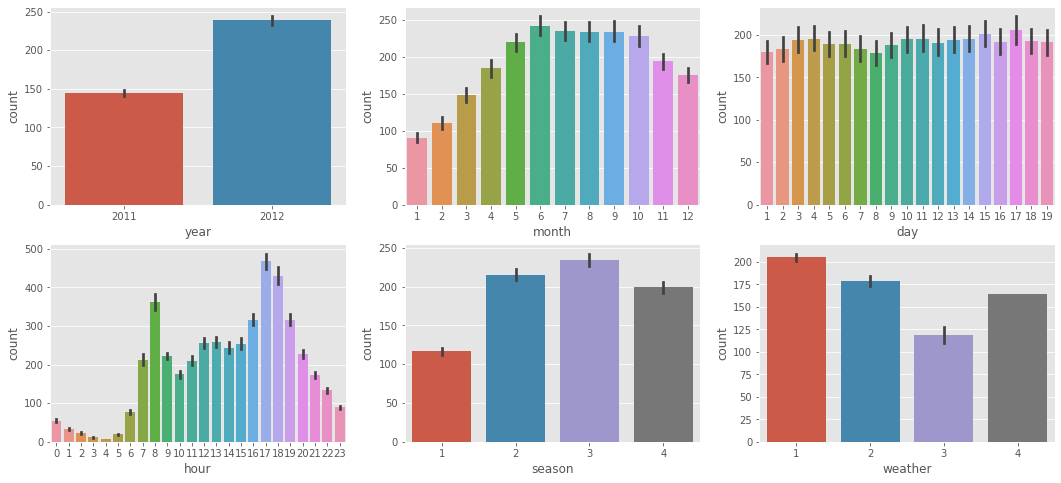

In [18]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=bike, x="year", y="count", ax=ax1)
sns.barplot(data=bike, x="month", y="count", ax=ax2)
sns.barplot(data=bike, x="day", y="count", ax=ax3)
sns.barplot(data=bike, x="hour", y="count", ax=ax4)
sns.barplot(data=bike, x="season", y="count", ax=ax5)
sns.barplot(data=bike, x="weather", y="count", ax=ax6)
#sns.barplot(data=bike, x="workingday", y="count", ax=ax3)

* 연도별 대여량은 2011년 보다 2012년이 더 많음
* 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많음. 1월이 가장 적음
* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있음. 사용불가
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많음. 하지만 주말과 나누어 분석해야함
* 가을(3)에 대여량 많음
* 일하는날(1)에 대여량이 조금 더 많음

<AxesSubplot:xlabel='hour', ylabel='count'>

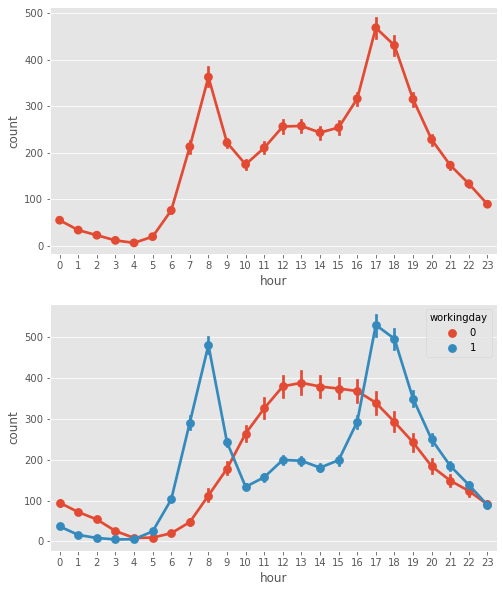

In [19]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(8,10)

sns.pointplot(data=bike, x="hour", y="count", ax=ax1)
sns.pointplot(data=bike, x="hour", y="count", hue="workingday", ax=ax2)

* workingday 기준 일하는날은 출퇴근시간에 대여량이 많은반면 휴일에는 오후 시간대에 대여량이 많음

* 수치형 데이터 histogram

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

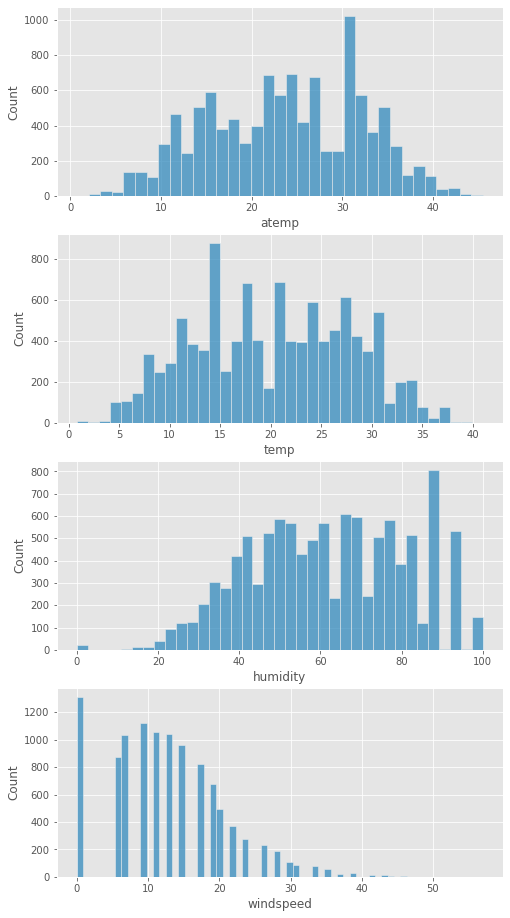

In [20]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
figure.set_size_inches(8,16)

sns.histplot(bike["atemp"], ax=ax1)
sns.histplot(bike["temp"], ax=ax2)
sns.histplot(bike["humidity"], ax=ax3)
sns.histplot(bike["windspeed"], ax=ax4)

* X와 y로 특성값과 타깃값 분리

In [22]:
bike_train_labels = bike_train["count"].copy()
bike_train.drop("count", axis=1, inplace=True) 

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTimeTransform(BaseEstimator, TransformerMixin):
    def __init__(self): # *args 또는 **kargs 없음
        pass
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X.datetime = X.datetime.apply(pd.to_datetime)
        year = X.datetime.apply(lambda x : x.year)
        month = X.datetime.apply(lambda x : x.month)
        #day = X.datetime.apply(lambda x : x.day)
        hour = X.datetime.apply(lambda x : x.hour)
        
        return np.c_[year, month, hour]

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class WindTransform(BaseEstimator, TransformerMixin):
    def __init__(self): # *args 또는 **kargs 없음
        self.model = None
        
    def fit(self, X, y=None): 
        wind_train = X[~(X["windspeed"] == 0)].copy()
        
        # 특성과 레이블로 분리
        wind_train_labels = wind_train["windspeed"].copy()
        wind_train_features = wind_train.drop("windspeed", axis=1) 
        
        # windspeed가 0이 아닌것드로 훈련
        forest_reg2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
        forest_reg2.fit(wind_train_features, wind_train_labels)
        self.model = forest_reg2
        return self  
    
    def transform(self, X):
        wind_test = X[X["windspeed"] == 0].copy()
        
        wind_test_labels = wind_test["windspeed"].copy()
        wind_test_features = wind_test.drop("windspeed", axis=1)      
        
        wind_predict = self.model.predict(wind_test_features)        
        # 예측된 값 원본에 넣어 반환하기
        X.loc[X["windspeed"] == 0, "windspeed"] = wind_predict        
        return np.c_[X]

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_pipeline = Pipeline([
        ('dt', DateTimeTransform()),
    ])

dt_tr = dt_pipeline.fit_transform(bike_train)
dt_tr

array([[2011,    1,    0],
       [2011,    1,    1],
       [2011,    1,    2],
       ...,
       [2012,   12,   21],
       [2012,   12,   22],
       [2012,   12,   23]], dtype=int64)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        #('std_scaler', StandardScaler()),
    ])

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ('ohe', OneHotEncoder()),
    ])

In [37]:
from sklearn.compose import ColumnTransformer

datetime_attrib = ["datetime"]
num_attribs = ["temp", "atemp", "humidity", "windspeed"]
cat_attribs = ["season", "holiday", "workingday", "weather"]

full_pipeline = ColumnTransformer([
        ("dt", dt_pipeline, datetime_attrib),
        ("num", WindTransform(), num_attribs),
        #("num", num_pipeline, num_attribs),
        #("num", 'drop', num_attribs),    
        ("cat", cat_pipeline, cat_attribs),
        #("cat", 'passthrough', cat_attribs),    
    ])

In [38]:
bike_train_prepared = full_pipeline.fit_transform(bike_train)

In [39]:
bike_train_prepared.shape

(10886, 19)

In [40]:
bike_train_prepared

array([[2.011e+03, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.011e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.011e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.012e+03, 1.200e+01, 2.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 1.200e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 1.200e+01, 2.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [41]:
datetime_attribs = ["year", "month", "hour"]
season_attribs = ["season1", "season2", "season3", "season4"]
holiday_attribs = ["holiday1", "holiday2"]
workingday_attribs = ["working1", "working2"]
weather_attribs = ["weather1" , "weather2" , "weather3" , "weather4"]
cat_attribs = ["season", "holiday", "workingday", "weather"]

columns =datetime_attribs + num_attribs + season_attribs + holiday_attribs + workingday_attribs + weather_attribs
#columns =datetime_attribs + num_attribs + cat_attribs
columns # 3 + 4 + 4(season) + 2(holiday) + 2(workingday) + 4(weather)

['year',
 'month',
 'hour',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'season1',
 'season2',
 'season3',
 'season4',
 'holiday1',
 'holiday2',
 'working1',
 'working2',
 'weather1',
 'weather2',
 'weather3',
 'weather4']

In [42]:
bike_prepared_df = pd.DataFrame(bike_train_prepared, columns =columns)
bike_prepared_df

,year,month,hour,temp,atemp,humidity,windspeed,season1,season2,season3,season4,holiday1,holiday2,working1,working2,weather1,weather2,weather3,weather4
0,2011.0,1.0,0.0,9.84,14.395,81.0,6.510787,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2011.0,1.0,1.0,9.02,13.635,80.0,6.013183,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2011.0,1.0,2.0,9.02,13.635,80.0,6.013183,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2011.0,1.0,3.0,9.84,14.395,75.0,6.289054,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2011.0,1.0,4.0,9.84,14.395,75.0,6.289054,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012.0,12.0,19.0,15.58,19.695,50.0,26.002700,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10882,2012.0,12.0,20.0,14.76,17.425,57.0,15.001300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10883,2012.0,12.0,21.0,13.94,15.910,61.0,15.001300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10884,2012.0,12.0,22.0,13.94,17.425,61.0,6.003200,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


* 전체 y 타깃값의 분포 확인 (histogram)
* 타겟값의 분표가 왜곡된 형태일 경우 정규 분포로 바꿈

<AxesSubplot:>

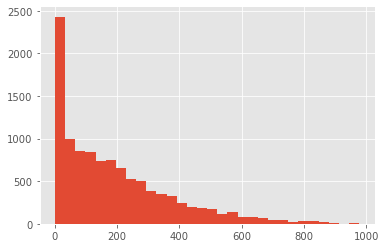

In [43]:
bike_train_labels.hist(bins=30)

* y 타깃값 로그변환하기

<AxesSubplot:>

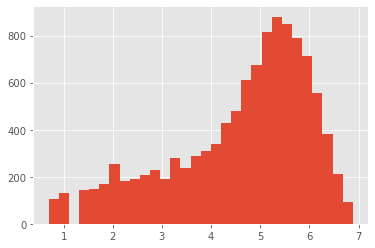

In [44]:
bike_train_labels_log = np.log1p(bike_train_labels)
bike_train_labels_log.hist(bins=30)

* 로그 변환(log1p())후 왜곡정도가 향상

* 훈련세트와 테스트 세트 분리

## 모델 선택과 훈련, 예측

- 평가(Evaluation)
- Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

Root Mean Squared Logarithmic Error (RMSLE)

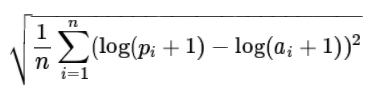

* RMSLE

In [45]:
from sklearn.metrics import make_scorer
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred, convertExp=True):
    if convertExp:
        y = np.expm1(y)
        pred = np.expm1(pred)
    
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
rmsle_scorer = make_scorer(rmsle)

* 선형 모델 훈련과 예측

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
lr_reg = LinearRegression()

In [48]:
scores = cross_val_score(lr_reg, bike_train_prepared, bike_train_labels_log,
                         scoring=rmsle_scorer, cv=5)
scores

array([1.0481945 , 0.94205295, 1.08505039, 1.03135503, 1.00203425])

In [49]:
## 위와 같은 결과가 나온 이유는 레이블이 이미 log 변환된 상태에서 mse를 구했기 때문에 결과적으로 msle가 나옴

In [50]:
# scores = cross_val_score(lr_reg, bike_train_prepared, bike_train_labels_log,
#                          scoring='neg_mean_squared_error', cv=5)
# np.sqrt(-scores)

* https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

* Ridge 모델

In [51]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10)
rmsle_scorer = make_scorer(rmsle)
scores = cross_val_score(ridge_reg, bike_train_prepared, bike_train_labels_log,
                         scoring=rmsle_scorer, cv=5)
scores

array([1.04806369, 0.94126322, 1.08516805, 1.03103054, 1.00197855])

* Ridge 파라미터 튜닝

In [52]:
ridge_reg = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

grid_search = GridSearchCV( ridge_reg,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

grid_search.fit( bike_train_prepared, bike_train_labels_log )

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300,
                                   400, 800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [53]:
grid_search.best_params_

{'alpha': 200, 'max_iter': 3000}

In [54]:
grid_search.best_estimator_

Ridge(alpha=200, max_iter=3000)

In [55]:
grid_search.best_score_

-1.0200864848977367

In [56]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

1.0217374002913548 {'alpha': 0.01, 'max_iter': 3000}
1.0217370085062565 {'alpha': 0.1, 'max_iter': 3000}
1.0217238998878024 {'alpha': 1, 'max_iter': 3000}
1.0217016903741458 {'alpha': 2, 'max_iter': 3000}
1.0216771186869738 {'alpha': 3, 'max_iter': 3000}
1.0216517594878842 {'alpha': 4, 'max_iter': 3000}
1.021500809159587 {'alpha': 10, 'max_iter': 3000}
1.0210757313086252 {'alpha': 30, 'max_iter': 3000}
1.020265437313903 {'alpha': 100, 'max_iter': 3000}
1.0200864848977367 {'alpha': 200, 'max_iter': 3000}
1.0205252166131458 {'alpha': 300, 'max_iter': 3000}
1.021326961514008 {'alpha': 400, 'max_iter': 3000}
1.0260598928567066 {'alpha': 800, 'max_iter': 3000}
1.0273714376843617 {'alpha': 900, 'max_iter': 3000}
1.0286834389170818 {'alpha': 1000, 'max_iter': 3000}


* 각 특성의 가중치(lr_reg.coef_) 확인하기 (sns.barplot 이용)

<AxesSubplot:>

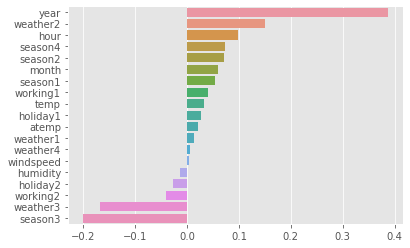

In [57]:
coef = pd.Series(grid_search.best_estimator_.coef_, index=columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

* 랜덤 포레스트 모델

In [58]:
forest_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [59]:
rmsle_scorer = make_scorer(rmsle)
score = cross_val_score(forest_reg, bike_train_prepared, bike_train_labels_log, cv=3, scoring=rmsle_scorer)

In [60]:
score

array([0.58308038, 0.63039949, 0.4046042 ])

In [ ]:
# scores = cross_val_score(forest_reg, bike_train_prepared, bike_train_labels_log, cv=3, scoring="neg_mean_squared_error")
# np.sqrt(-scores)

* 랜덤 포레스트 파라미터 튜닝

* 그리드 탐색

In [63]:
param_grid = [
    #{'n_estimators': [100, 200, 300], 'max_features': [2, 4, 6, 8, 10], 'max_depth' : [4, 6, 8, 10]},
    {'n_estimators': [100, 200, 300], 'max_features': [12, 14, 16], 'max_depth' : [10, 12, 14, 16, 18]},
    #{'n_estimators': [200], 'max_features': ["auto", "sqrt"], 'max_depth' : [10, 12, 14]}
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring=rmsle_scorer, 
                           return_train_score=True, n_jobs=-1)
%time grid_search.fit(bike_train_prepared, bike_train_labels_log)

Wall time: 9min 47s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10, 12, 14, 16, 18],
                          'max_features': [12, 14, 16],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True,
             scoring=make_scorer(rmsle, greater_is_better=False))

In [64]:
grid_search.best_params_

{'max_depth': 18, 'max_features': 14, 'n_estimators': 200}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=18, max_features=14, n_estimators=200,
                      random_state=42)

In [66]:
cvres = grid_search.cv_results_

In [67]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.47824044304835234 {'max_depth': 10, 'max_features': 12, 'n_estimators': 100}
0.476555598160137 {'max_depth': 10, 'max_features': 12, 'n_estimators': 200}
0.4761395233355941 {'max_depth': 10, 'max_features': 12, 'n_estimators': 300}
0.4707188187552598 {'max_depth': 10, 'max_features': 14, 'n_estimators': 100}
0.47168652073192946 {'max_depth': 10, 'max_features': 14, 'n_estimators': 200}
0.4716686521285395 {'max_depth': 10, 'max_features': 14, 'n_estimators': 300}
0.47241699592724906 {'max_depth': 10, 'max_features': 16, 'n_estimators': 100}
0.47177933616162654 {'max_depth': 10, 'max_features': 16, 'n_estimators': 200}
0.4711677332327344 {'max_depth': 10, 'max_features': 16, 'n_estimators': 300}
0.45675683640359327 {'max_depth': 12, 'max_features': 12, 'n_estimators': 100}
0.45575094383976095 {'max_depth': 12, 'max_features': 12, 'n_estimators': 200}
0.4551289328665578 {'max_depth': 12, 'max_features': 12, 'n_estimators': 300}
0.45607345671284055 {'max_depth': 12, 'max_features': 14, '

In [68]:
#final_model = grid_search.best_estimator_

* 랜덤 탐색

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=180, high=220),
        'max_features': randint(low=12, high=18),
        'max_depth': randint(low=16, high=20),

    }
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring=rmsle_scorer, 
                                random_state=42, n_jobs=-1)
rnd_search.fit(bike_train_prepared, bike_train_labels_log)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013C114636A0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013C11463520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013C114632B0>},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False))

In [77]:
rnd_search.best_params_

{'max_depth': 18, 'max_features': 14, 'n_estimators': 187}

In [78]:
cvres = rnd_search.cv_results_

In [79]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.45054712324554114 {'max_depth': 18, 'max_features': 15, 'n_estimators': 208}
0.4473662555605783 {'max_depth': 18, 'max_features': 14, 'n_estimators': 187}
0.4534577086082295 {'max_depth': 16, 'max_features': 16, 'n_estimators': 218}
0.45083414189939275 {'max_depth': 17, 'max_features': 14, 'n_estimators': 202}
0.44810018225405973 {'max_depth': 18, 'max_features': 14, 'n_estimators': 203}
0.4514492008833345 {'max_depth': 16, 'max_features': 15, 'n_estimators': 219}
0.4488581376589044 {'max_depth': 19, 'max_features': 14, 'n_estimators': 201}
0.4493651148847048 {'max_depth': 16, 'max_features': 13, 'n_estimators': 203}
0.454909922925906 {'max_depth': 19, 'max_features': 17, 'n_estimators': 217}
0.451542639168076 {'max_depth': 17, 'max_features': 15, 'n_estimators': 200}
0.45116689725063114 {'max_depth': 16, 'max_features': 15, 'n_estimators': 201}
0.45096931715711436 {'max_depth': 16, 'max_features': 15, 'n_estimators': 204}
0.4490915573303062 {'max_depth': 16, 'max_features': 14, 'n_e

* 특성 중요도

In [80]:
feature_importances = rnd_search.best_estimator_.feature_importances_

In [81]:
sorted(zip(feature_importances, columns), reverse=True)

[(0.7388659158542674, 'hour'),
 (0.04446560458453936, 'temp'),
 (0.041470423819801455, 'atemp'),
 (0.03127118520567763, 'year'),
 (0.029187401065254658, 'month'),
 (0.027308278107092077, 'working1'),
 (0.025421450968278032, 'humidity'),
 (0.023076390765631238, 'working2'),
 (0.011610905520210359, 'windspeed'),
 (0.009575779184038152, 'season1'),
 (0.008743139606692242, 'weather3'),
 (0.0020332748625547957, 'season4'),
 (0.0017165863286692272, 'weather1'),
 (0.0012963755435888452, 'weather2'),
 (0.0011348572126618944, 'holiday2'),
 (0.0010568977873968654, 'holiday1'),
 (0.0010070338962610715, 'season2'),
 (0.0007578633596458821, 'season3'),
 (6.363277389403257e-07, 'weather4')]

* 배깅 (위에서 랜덤 탐색으로 얻은 최적을 모델 10개를 다시 한번 앙상블)

In [82]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(
    rnd_search.best_estimator_, n_estimators=10,
    max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [83]:
final_model = bag_reg

## 전체 훈련 세트로 훈련

In [84]:
final_model.fit(bike_train_prepared, bike_train_labels_log)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=18,
                                                      max_features=14,
                                                      n_estimators=187,
                                                      random_state=42),
                 n_jobs=-1, random_state=42)

테스트 데이터 예측

In [85]:
bike_test_prepared = full_pipeline.transform(bike_test)
final_test_pred = final_model.predict(bike_test_prepared)
final_test_pred = np.expm1(final_test_pred)

* train 데이터의 정답값과 test 데이터의 예측값 분포 확인

[Text(0.5, 1.0, 'final_test_pred')]

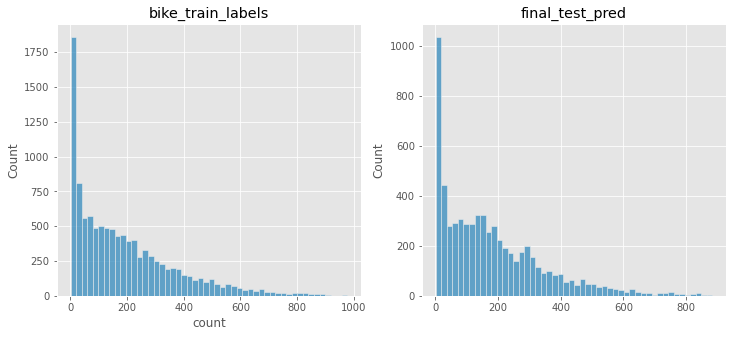

In [86]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.histplot(bike_train_labels,ax=ax1,bins=50)
ax1.set(title="bike_train_labels")
sns.histplot(final_test_pred,ax=ax2,bins=50)
ax2.set(title="final_test_pred")

Submission

In [87]:
submission = pd.read_csv("datasets/sampleSubmission.csv")
submission

submission["count"] = final_test_pred

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.486018
1,2011-01-20 01:00:00,4.659041
2,2011-01-20 02:00:00,2.923306
3,2011-01-20 03:00:00,2.813578
4,2011-01-20 04:00:00,2.451391


In [88]:
submission.tail()

,datetime,count
6488,2012-12-31 19:00:00,261.120816
6489,2012-12-31 20:00:00,190.624795
6490,2012-12-31 21:00:00,135.701224
6491,2012-12-31 22:00:00,108.230897
6492,2012-12-31 23:00:00,70.987251


In [89]:
ver = 10

In [90]:
submission.to_csv("datasets/bike_ver_{0}_submission.csv".format(ver), index=False)